In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
excel_data = pd.ExcelFile(r"C:\Users\Shantanu\Downloads\EastWestAirlines.xlsx")
excel_data

In [3]:
sheet_names = excel_data.sheet_names[1]
sheet_names

'data'

In [4]:
df = excel_data.parse(sheet_names)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

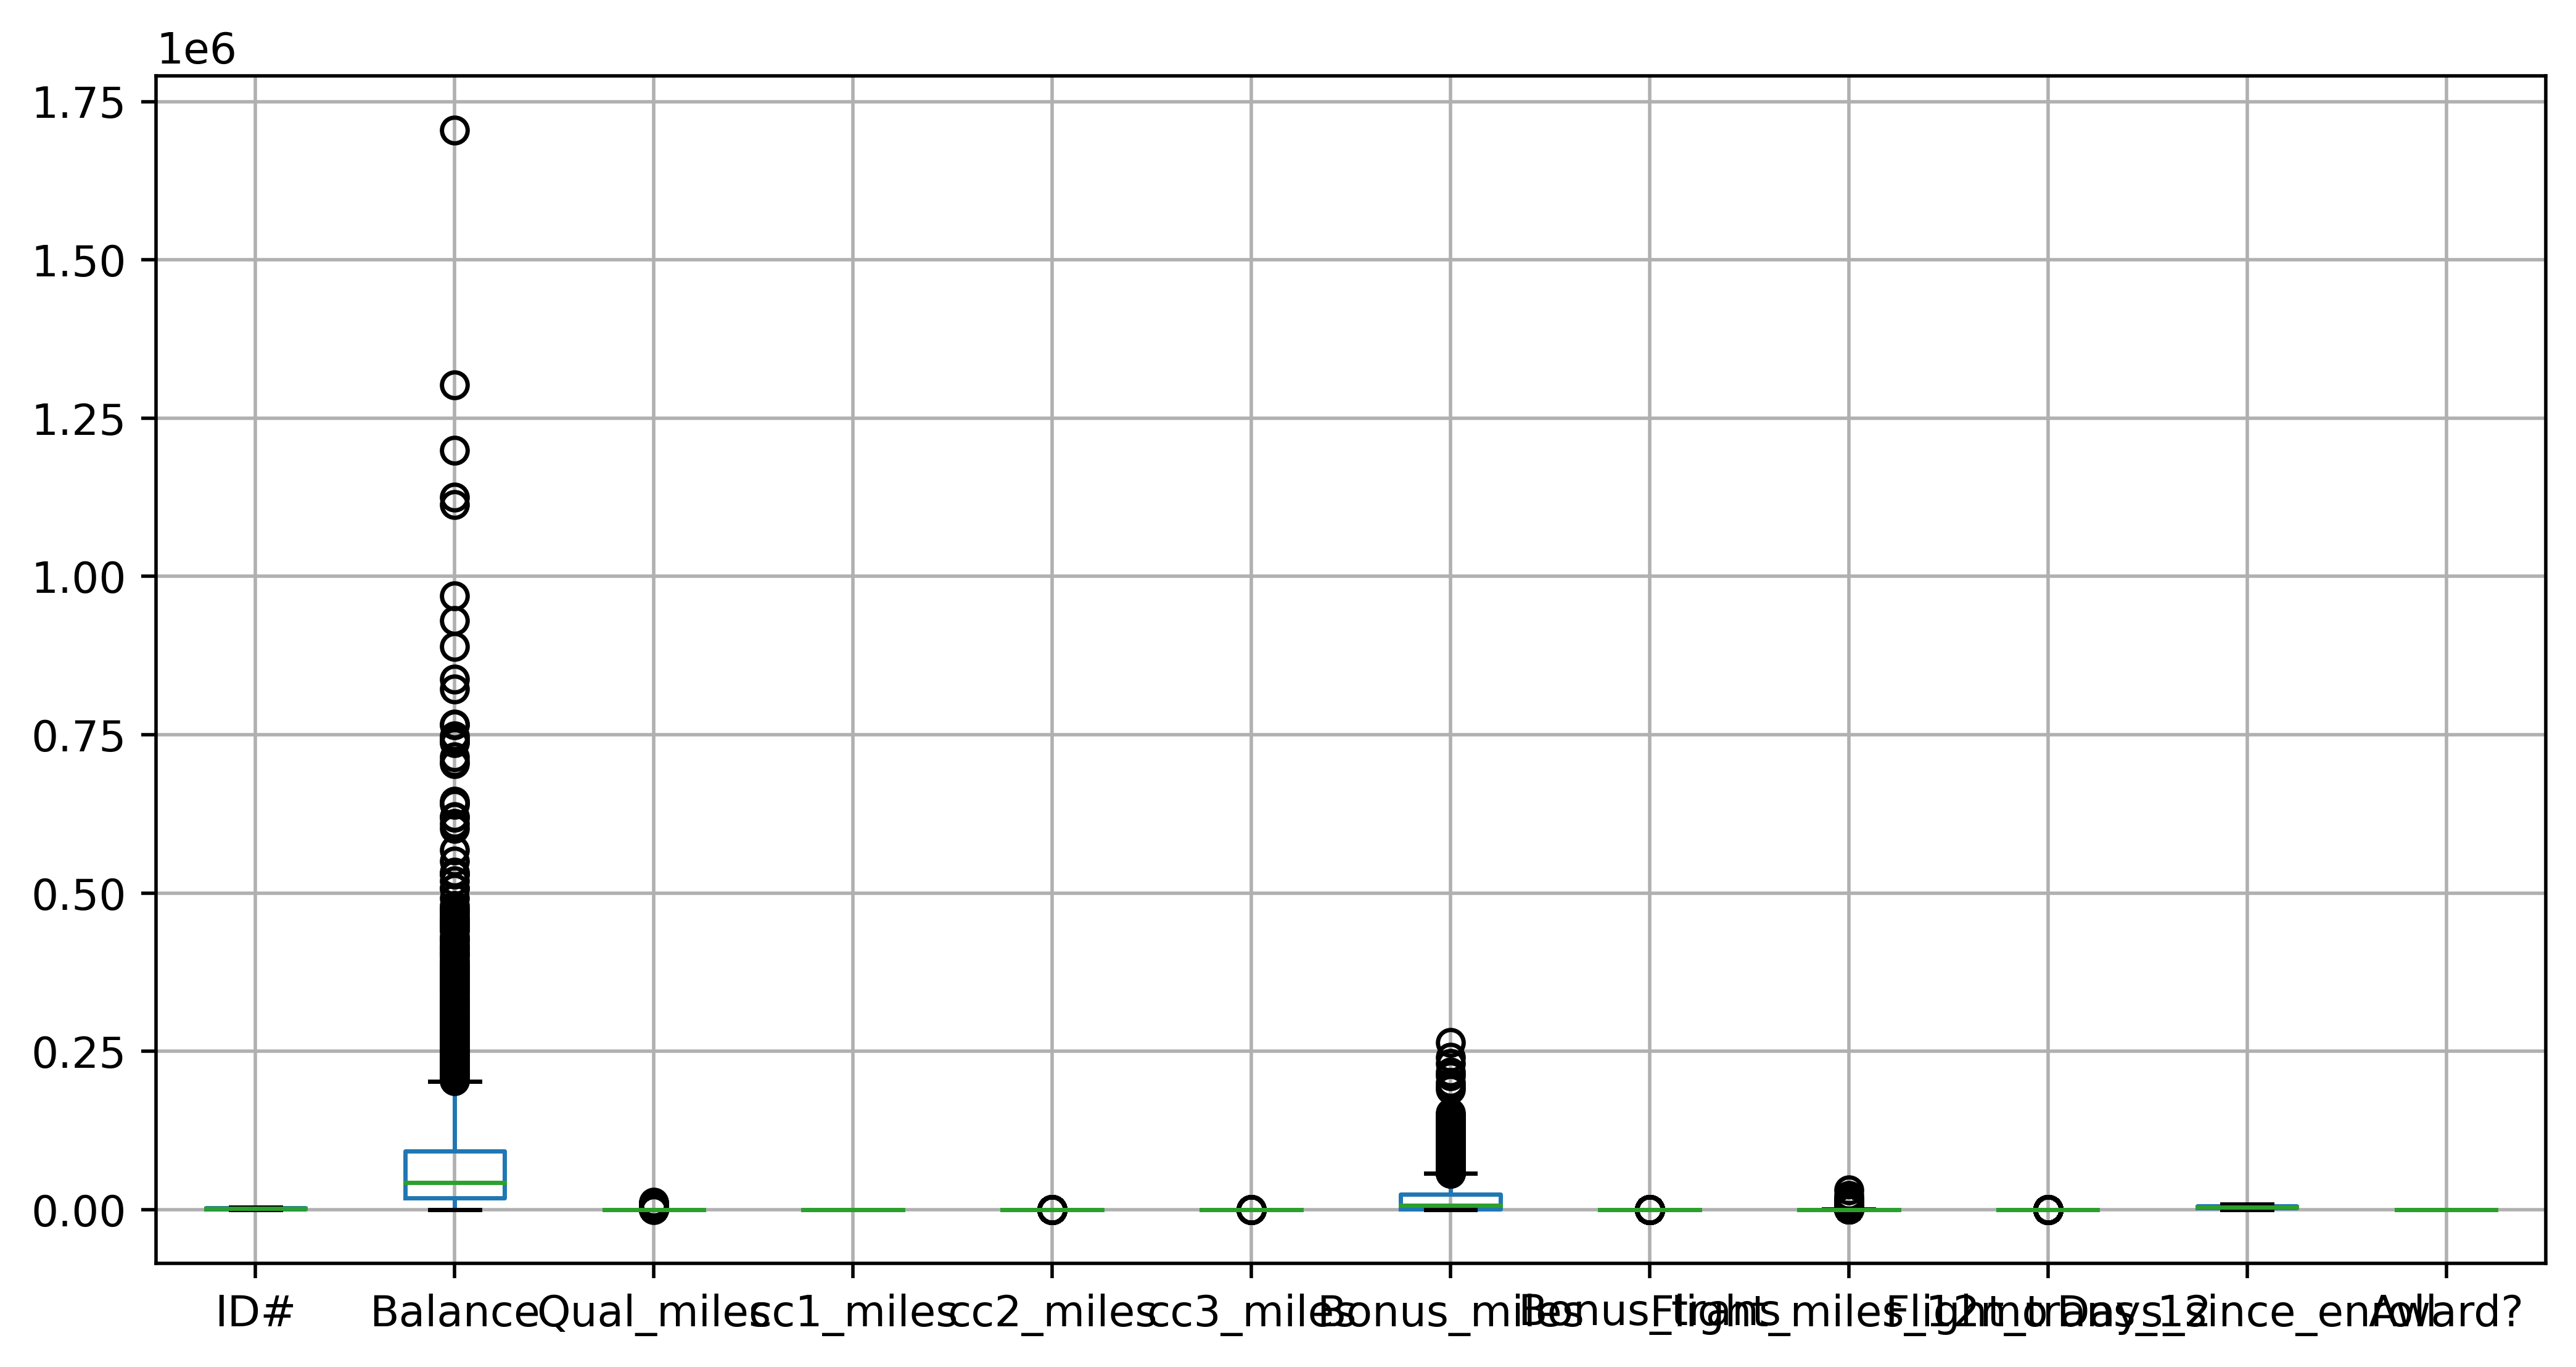

In [8]:
df.boxplot()

In [9]:
def outlier(data, colname):
    for col in colname:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3 - q1

        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))     

In [10]:
outlier(df, df.columns)

<Axes: >

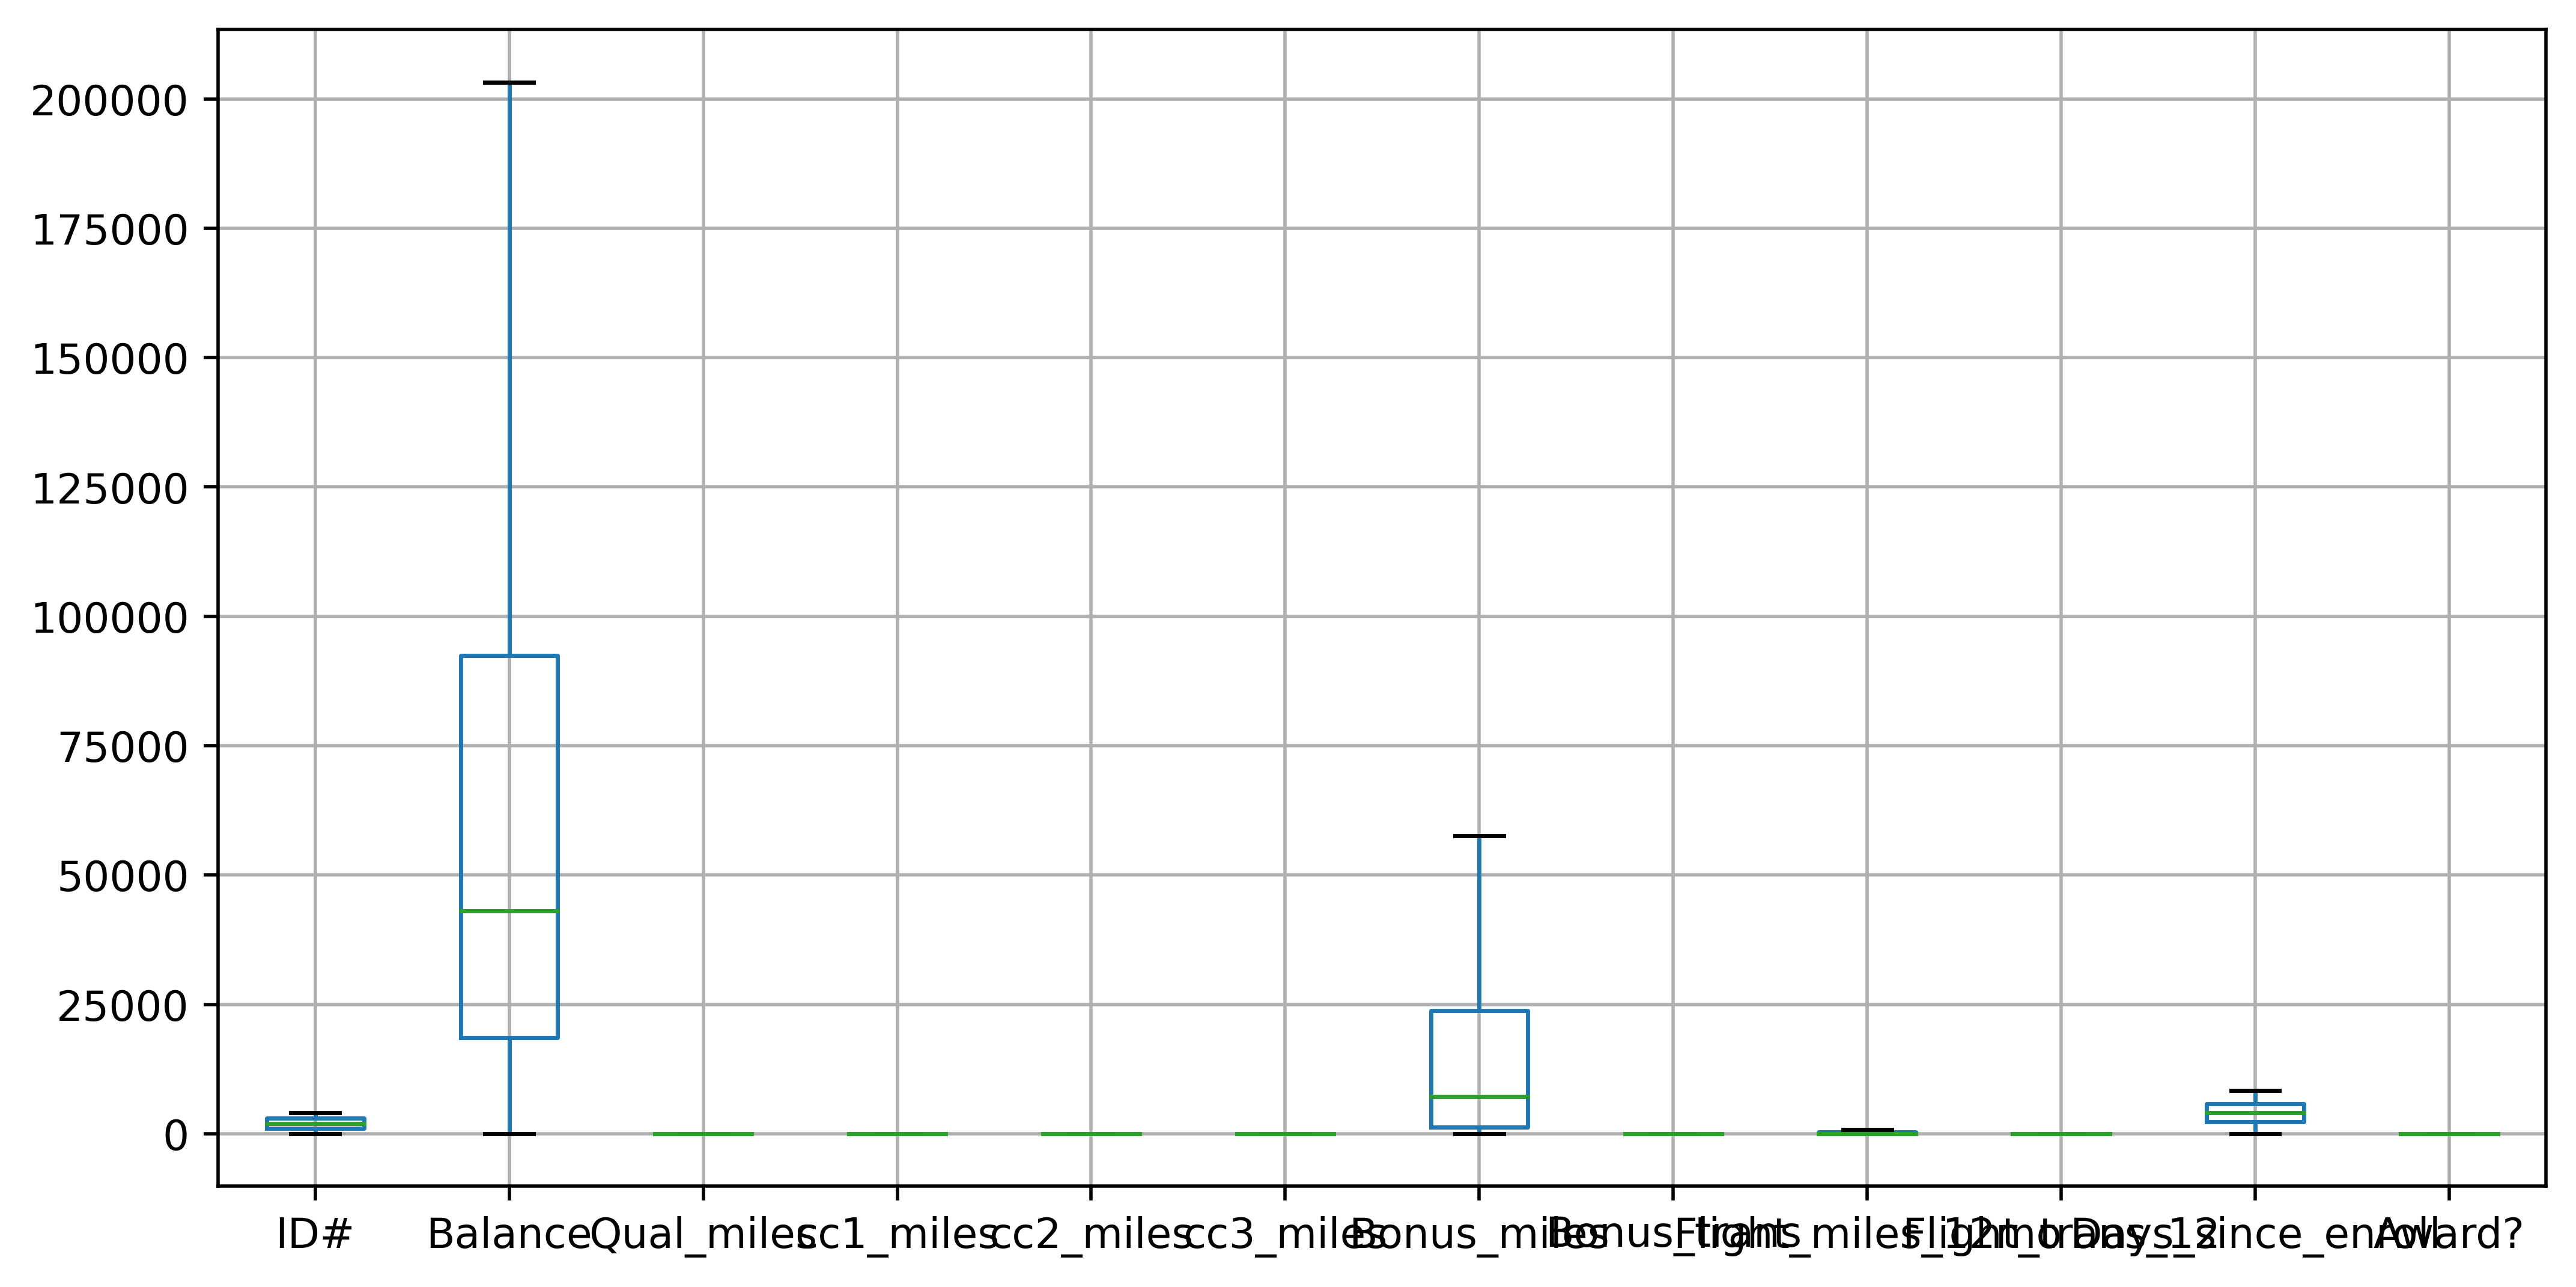

In [11]:
df.boxplot()

In [12]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,2.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,3.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,4.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,5.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017.0,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,4018.0,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,4019.0,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,4020.0,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
df = sc.fit_transform(df)
df

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [15]:
from scipy.cluster import hierarchy

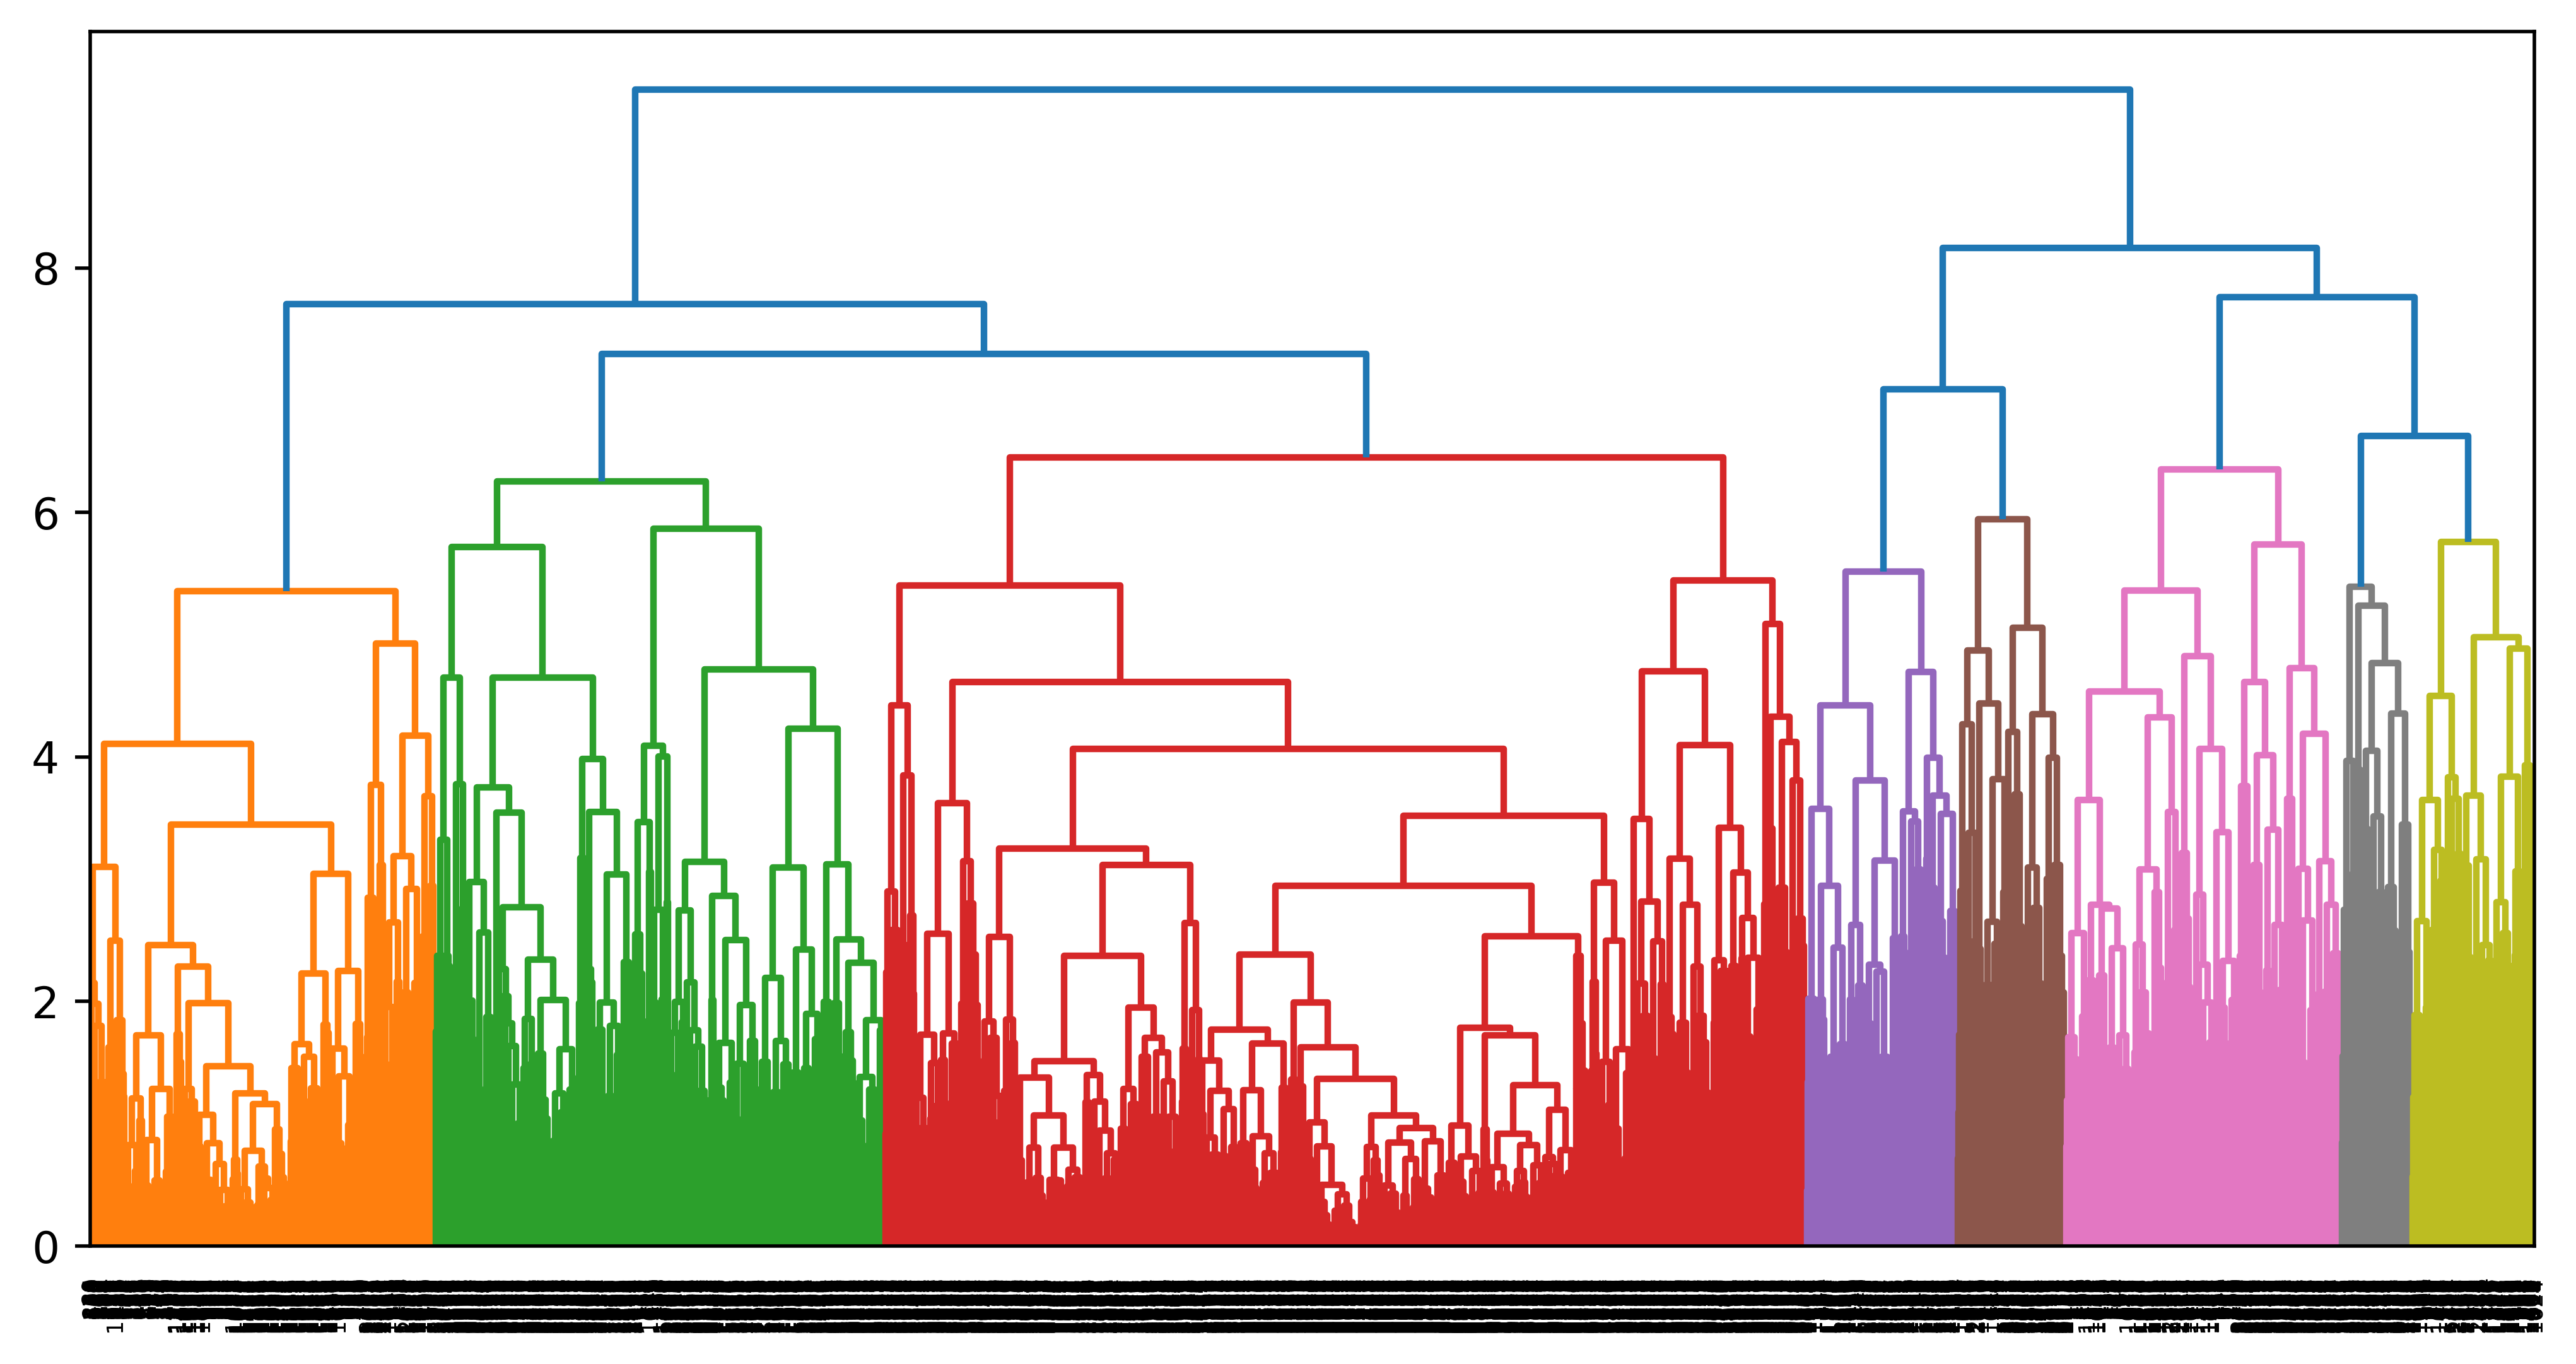

In [16]:
lk = hierarchy.linkage(df, method="complete")
dendrogram = hierarchy.dendrogram(lk)

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
hc = AgglomerativeClustering(n_clusters=8)
ypred = hc.fit_predict(df)
ypred

array([5, 5, 5, ..., 0, 7, 1], dtype=int64)

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(df,ypred)

0.1892402600478193